# A Python short course on Atmospheric Data Analysis - Week 2  

This Python tutorial was written in June 2024 by Ludving Cano, Research Assistant at the [Laboratory for Atmospheric Physics](http://www.chacaltaya.edu.bo) - UMSA (lcano@chacaltaya.edu.bo). It shows the basic I/O commands, opening dataset and start formatting data into Pandas dataframes.

On **week 2** we will cover:

 - Usage of Paths in Python
 - Open and read files
 - Formatting data
 - `Pandas I`
   - Opening a simple dataset
   - Basic commands with pandas
   - Opening a more complicated dataset
   - Basic statistics with Pandas

## Libraries that we will use

For this week we will start using libraries, depending on what do you want to do it's better to use or another. At the moment we will use:

 - [OS](https://docs.python.org/3/library/os.html) is a library used for general things that involve the system itself (your computer), we will use it mostly for opening and searching for files.
 - [Pathlib](https://docs.python.org/3/library/pathlib.html) is a library that offers some advantages while working with files, we will learn some things in parallel in OS.
 - [Pandas](https://pandas.pydata.org/) it's going to be our main library from now on, it offers A LOT of advantages when working with tables (or what we will call now, _dataframes_).
 - [Numpy](https://numpy.org/) it's mostly a numerical library, it offers advantages with numerical processing and calculations.
 
I added a link to its main documentation in each bullet. Just to a click on it!

# 1. Paths
What's a path? It a route (in spanish _ruta_), it can tell us where a file is located and from there we can try to reach it. Paths are a combination of directories and subdirectories (and at the end the file itself) and they are usually separated by a backslash (\\) or forward slash (/).

There are two main types: 

 - Absolute path: It's where a file is located from the ROOT (or the origin) of the computer, the advantage is that even if we are accessing from a different directory each time, we can get the file path, the disadvantage is that if we change of computer we have to change our absolute path.
 - Relative path: It's where a file is located from where YOU are right now, for example, if we want to access any of our data we simply go to `data/`, the disadvantange is that if we change of directory from where we are executing our code, we have to change the relative path.
 

If you want to see it this way, the absolute path is the current directory + the relative path.

For example if you are on Jupyter lab you can generate the absolute path by doing a right click on a file, and from VSCode you have the option for both.

<b><font color="green" size=5>Example 1: Where are you from?</font></b>


As said before, normally from where you are executing your code (a Python script for example) is called the  _current working directory_. I'll show how to show it in two ways, with Pathlib and OS.

In [1]:
## Let's not forget to import our libraries
import os
from pathlib import Path #--We will only use Path, not the entire library

In [2]:
os.getcwd()

'/home/ludving/LFA/LFA-python-short-course'

In [3]:
Path.cwd()

PosixPath('/home/ludving/LFA/LFA-python-short-course')

As you can see, they practically show the same thing, it's where you are running your code from. The unique thing that changes is that when we use Path, we get an object called PosixPath (or this can change in Windows).

Anyway, for the first method, `os.getcwd()`, we can see that is a string:

In [4]:
# Write your code for showing which type of variable is os.getcwd()
type(os.getcwd())


str

### Writing simple paths
As you can see, we can generate to whatever we want by just defining a string with its content. For example:

In [5]:
path_test = 'data_samples/test1.txt'

### Knowing if something exists `os.path.exists()`
Sometimes we want to know if a certain file exists or not (this is useful in cases when you work with well-formatted files, for example when the date is the name of the file). Then we want to know whether we can open this or not. If we try to open something that doesn't exist, the code will raise an error, so before opening it it's good to know this. 

In [6]:
does_exist = os.path.exists(path_test)
does_exist

False

For now we will stay here, and if needed we will learn more things for `os` and `path`. Let's open our first file!

# 2. Opening files

## Opening a log data
We will start with a _well behaved_ data, data from the [DECADE](https://www.geography.unibe.ch/research/climatology_group/research_projects/decade/index_eng.html), it's useful for meteorology experiments.

Let's say the metadata for our dataset is stored in a file named `log_1_decade.txt` inside the `data_samples` directory. To open it let's simply use open and print our result.

In [7]:
f = open('data_samples/log_1_decade.txt', 'r')
print(f)

<_io.TextIOWrapper name='data_samples/log_1_decade.txt' mode='r' encoding='UTF-8'>


What happened? We don't have the contents of our data. We only *opened* the file, now we need to *read* it

In [8]:
f.read()

'Station Name: SAN_CALIXTO  \nDECADE Code : BOLP010584\nWMO Code    : NA  \nWMO Class   : 1\nLatitude    : -16.493944\nLongitude   : -68.134306\nAltitude (m): 3669\nSource of coordinates: VISIT_GOOGLE_EART\nMetadata visit form  : SI\nMetadata file: NO\nModification date: 2016/11/21'

Now we have the content **as one single string**, this can be useful sometimes, sometimes we want to read line by line, for this we use the `readlines()` method (Note: we need to open the file again!)

In [9]:
f = open('data_samples/log_1_decade.txt', 'r')
lst = f.readlines()
lst

['Station Name: SAN_CALIXTO  \n',
 'DECADE Code : BOLP010584\n',
 'WMO Code    : NA  \n',
 'WMO Class   : 1\n',
 'Latitude    : -16.493944\n',
 'Longitude   : -68.134306\n',
 'Altitude (m): 3669\n',
 'Source of coordinates: VISIT_GOOGLE_EART\n',
 'Metadata visit form  : SI\n',
 'Metadata file: NO\n',
 'Modification date: 2016/11/21']

We see that we got a list, where each element is a line of the file, it ends with a \n which means a line break, to get rid of these we can do ([using list comprehension](https://www.w3schools.com/python/python_lists_comprehension.asp)):

In [10]:
[i.strip() for i in lst]

['Station Name: SAN_CALIXTO',
 'DECADE Code : BOLP010584',
 'WMO Code    : NA',
 'WMO Class   : 1',
 'Latitude    : -16.493944',
 'Longitude   : -68.134306',
 'Altitude (m): 3669',
 'Source of coordinates: VISIT_GOOGLE_EART',
 'Metadata visit form  : SI',
 'Metadata file: NO',
 'Modification date: 2016/11/21']

In [11]:
lst2 = []
for i in lst:
    lst2.append(i.strip())
lst2

['Station Name: SAN_CALIXTO',
 'DECADE Code : BOLP010584',
 'WMO Code    : NA',
 'WMO Class   : 1',
 'Latitude    : -16.493944',
 'Longitude   : -68.134306',
 'Altitude (m): 3669',
 'Source of coordinates: VISIT_GOOGLE_EART',
 'Metadata visit form  : SI',
 'Metadata file: NO',
 'Modification date: 2016/11/21']

Sometimes we will need to get, for example, the altitude for each dataset (it's located in the 7th line), so, to get only the altitude we will do the following:

In [12]:
line7 = lst2[6] #the 7th element is in the position 6, as it starts from 0
altitude = int(line7.split(":")[1].strip()) #we split it by the colon :, this returns a list of the first and the second part and we care of the second one
altitude

3669

## Opening a pandas dataframe

And... that's it for now, it may be hard (and it is), we will come back on using that dataset soon, for now let's open a _cute_ dataset, this contains the Ultraviolet Radiation taken with a sensor at the roof of our building for the 18th of June. The file is named `IUV_18_06.csv`

In [13]:
# first import pandas
import pandas as pd

The most simple way to open a dataset is with the `read_csv()` function, as the first parameter we put the path to the file, the separator by default is comma (that's why we use the \_csv function), as a result we get a dataframe

In [14]:
df = pd.read_csv('data_samples/IUV_18_06.csv')
df

,TIME,IUV
0,18/06/2024 06:00,0.0
1,18/06/2024 06:01,0.0
2,18/06/2024 06:02,0.0
3,18/06/2024 06:03,0.0
4,18/06/2024 06:04,0.0
...,...,...
712,18/06/2024 17:55,0.0
713,18/06/2024 17:56,0.0
714,18/06/2024 17:57,0.0
715,18/06/2024 17:58,0.0


## Showing n first values
To do this, we use the `df.head(n)` method, where n in an integer of how many rows we want to show: 

In [17]:
df.head(3)

,TIME,IUV
0,18/06/2024 06:00,0.0
1,18/06/2024 06:01,0.0
2,18/06/2024 06:02,0.0


Life sometimes is easy as that, we can know which type of data we have stored in each column with df.dtypes (Note: this is a method of the object df, the table itself has the property)

In [18]:
df.dtypes

TIME     object
IUV     float64
dtype: object

First we'll learn how to call one specific column, for example the IUV column:

In [19]:
df.IUV

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
712    0.0
713    0.0
714    0.0
715    0.0
716    0.0
Name: IUV, Length: 717, dtype: float64

In [20]:
df['IUV']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
712    0.0
713    0.0
714    0.0
715    0.0
716    0.0
Name: IUV, Length: 717, dtype: float64

Let's do some maths! we can get the maximum value in the IUV data

In [30]:
a = df['IUV'].mean() #which can be the min?

In [31]:
a

2.8364156206415623

Or simply, if we want to know the general info about a numerical column, we can describe it:

In [32]:
df.IUV.describe()

count    717.000000
mean       2.836416
std        2.855432
min        0.000000
25%        0.000000
50%        1.950000
75%        5.700000
max        7.630000
Name: IUV, dtype: float64

A big spoiler! We can plot within the column itself, we won't use this as can be difficult to customize, but as a first approach is fine:

<Axes: >

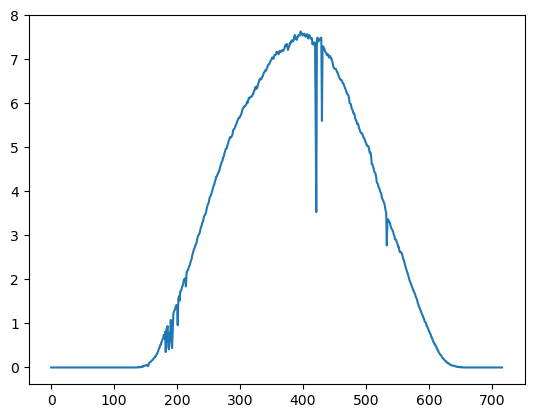

In [33]:
df.IUV.plot()

We can filter things based on conditions, this has the format `df[condition]`

In [34]:
df[df.IUV > 0] #from when we have a measurement of UV?

,TIME,IUV
138,18/06/2024 08:18,0.01
139,18/06/2024 08:19,0.01
141,18/06/2024 08:21,0.01
142,18/06/2024 08:22,0.01
143,18/06/2024 08:23,0.02
...,...,...
648,18/06/2024 16:51,0.01
649,18/06/2024 16:52,0.01
650,18/06/2024 16:53,0.01
652,18/06/2024 16:55,0.01


## Sorting a dataset
We can sort a dataset based on one or more columns, for example:


In [37]:
df.sort_values('IUV', ascending = False).head(10)

,TIME,IUV
396,18/06/2024 12:36,7.63
397,18/06/2024 12:37,7.61
398,18/06/2024 12:38,7.59
402,18/06/2024 12:42,7.58
406,18/06/2024 12:46,7.57
401,18/06/2024 12:41,7.57
387,18/06/2024 12:27,7.55
410,18/06/2024 12:50,7.55
399,18/06/2024 12:39,7.55
394,18/06/2024 12:34,7.55


We will stop here (for now) with this dataset, now we will open a more complicated one, but be sure that this dataset will be useful for us.

## Opening with headers and whitespaces

A simple version of a DECADE dataset is stored in `EL_ALTO_AEROPUERTO_simple.dat`. Let's inpect the first 20 rows to see how is the header and the first rows of data:

In [38]:
f2 = open('data_samples/EL_ALTO_AEROPUERTO_simple.dat', 'r')
[i.strip() for i in f2.readlines()[:20]]

['Station Name: EL_ALTO_AEROPUERTO',
 'DECADE Code : BOLP020168',
 'WMO Code    : 85201',
 'WMO Class   : 1',
 'Latitude    : -16.510367',
 'Longitude   : -68.198583',
 'Altitude (m): 4037',
 'Source of coordinates: VISIT_GOOGLE_EART',
 'Metadata visit form  : SI',
 'Metadata file: YES',
 'Modification date: 2016/11/21',
 '------------------------------',
 'Julday  Year  Mo  Da  Param=1  flag1  flag2  flag3  tru  tru.val  tru.thr  gap  gap.val  wee.cyc  wee.cyc.str  asy.rou  uni.con  mea.pre  mea.pre.ind  mea.pre.inc  oth.qua.pro  gro.inh  out.rel  GHCND.all  GHCND.all.ada  GHCND.sel  GHCND.sel.ada  mon.sum.all  acm.mon.out.all  acm.mon.bp.all  acm.mon.adj.all  acm.int.val.all  acm.fla.all  mon.sum.sel  acm.mon.out.sel  acm.mon.bp.sel  acm.mon.adj.sel  acm.int.val.sel  acm.fla.sel',
 '2443875  1979   1   1     4.2  070  00  000        0   -999.9   -999.9        0   -999.9        0   -999.9        2        0        4        2        1        0        0        0        A        A        

So, we can see a header that takes 12 lines (including the --) that we will ignore. If we try to open it as it is we will get an error, as the read_csv interprets the first row as a header.

Second problem, the data is separated by irregular intervals of whitespaces, there are fixes for these problems that are available in the [documentation of read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Let's do a break to read it!

After reading the documentation, the way to read this dataset will be the following:

In [39]:
df2 = pd.read_csv('data_samples/EL_ALTO_AEROPUERTO_simple.dat', delim_whitespace=True, skiprows=12)
df2

,Julday,Year,Mo,Da,Param=1,flag1,flag2,flag3,tru,tru.val,...,acm.mon.bp.all,acm.mon.adj.all,acm.int.val.all,acm.fla.all,mon.sum.sel,acm.mon.out.sel,acm.mon.bp.sel,acm.mon.adj.sel,acm.int.val.sel,acm.fla.sel
0,2443875,1979,1,1,4.2,70,0,0,0.0,-999.9,...,0.0,1.0,-888.8,1,195.8,0.0,0.0,1.0,-888.8,1
1,2443876,1979,1,2,2.2,70,0,0,0.0,-999.9,...,0.0,1.0,-888.8,1,195.8,0.0,0.0,1.0,-888.8,1
2,2443877,1979,1,3,2.1,70,0,0,0.0,-999.9,...,0.0,1.0,-888.8,1,195.8,0.0,0.0,1.0,-888.8,1
3,2443878,1979,1,4,7.6,70,0,0,0.0,-999.9,...,0.0,1.0,-888.8,1,195.8,0.0,0.0,1.0,-888.8,1
4,2443879,1979,1,5,13.6,70,0,0,0.0,-999.9,...,0.0,1.0,-888.8,1,195.8,0.0,0.0,1.0,-888.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13509,2457384,2015,12,27,1.8,50,0,0,0.0,-999.9,...,0.0,1.0,-888.8,1,70.6,0.0,0.0,1.0,-888.8,1
13510,2457385,2015,12,28,0.0,50,0,0,0.0,-999.9,...,0.0,1.0,-888.8,1,70.6,0.0,0.0,1.0,-888.8,1
13511,2457386,2015,12,29,5.2,50,0,0,0.0,-999.9,...,0.0,1.0,-888.8,1,70.6,0.0,0.0,1.0,-888.8,1
13512,2457387,2015,12,30,0.0,50,0,0,0.0,-999.9,...,0.0,1.0,-888.8,1,70.6,0.0,0.0,1.0,-888.8,1


We have too many columns, we can't see it! We can get the names of columns using the method df.columns

In [40]:
df2.columns

Index(['Julday', 'Year', 'Mo', 'Da', 'Param=1', 'flag1', 'flag2', 'flag3',
       'tru', 'tru.val', 'tru.thr', 'gap', 'gap.val', 'wee.cyc', 'wee.cyc.str',
       'asy.rou', 'uni.con', 'mea.pre', 'mea.pre.ind', 'mea.pre.inc',
       'oth.qua.pro', 'gro.inh', 'out.rel', 'GHCND.all', 'GHCND.all.ada',
       'GHCND.sel', 'GHCND.sel.ada', 'mon.sum.all', 'acm.mon.out.all',
       'acm.mon.bp.all', 'acm.mon.adj.all', 'acm.int.val.all', 'acm.fla.all',
       'mon.sum.sel', 'acm.mon.out.sel', 'acm.mon.bp.sel', 'acm.mon.adj.sel',
       'acm.int.val.sel', 'acm.fla.sel'],
      dtype='object')

### Slicing columns and rows
What is we only want the first 5 columns? Pandas offers two ways to slice a dataset `loc` and `iloc`. The former uses the labels and the latter the indexes.

In [42]:
df2.iloc[:3,:5]

,Julday,Year,Mo,Da,Param=1
0,2443875,1979,1,1,4.2
1,2443876,1979,1,2,2.2
2,2443877,1979,1,3,2.1


In [43]:
df3 = df2.loc[:,['Year','Mo','Da','Param=1']]
df3

,Year,Mo,Da,Param=1
0,1979,1,1,4.2
1,1979,1,2,2.2
2,1979,1,3,2.1
3,1979,1,4,7.6
4,1979,1,5,13.6
...,...,...,...,...
13509,2015,12,27,1.8
13510,2015,12,28,0.0
13511,2015,12,29,5.2
13512,2015,12,30,0.0


Another way of calling some columns is with double square brackets:

In [45]:
df3[['Year','Mo','Da']]

,Year,Mo,Da
0,1979,1,1
1,1979,1,2
2,1979,1,3
3,1979,1,4
4,1979,1,5
...,...,...,...
13509,2015,12,27
13510,2015,12,28
13511,2015,12,29
13512,2015,12,30


What if we want to rename ALL the columns? We can reassign all the column names using `df.columns = [newlist]`

In [47]:
df3.columns = ['year','month','day','prcp']
df3

,year,month,day,prcp
0,1979,1,1,4.2
1,1979,1,2,2.2
2,1979,1,3,2.1
3,1979,1,4,7.6
4,1979,1,5,13.6
...,...,...,...,...
13509,2015,12,27,1.8
13510,2015,12,28,0.0
13511,2015,12,29,5.2
13512,2015,12,30,0.0


or if we want to only rename ONE (or not all) columns, we have to use a dictionary within the method df.rename.

A dictionary is used by `dct = {'key':'val','key2':'val2'}`

In [48]:
df3.rename(columns = {'day':'dia'}, inplace = True)
df3

,year,month,dia,prcp
0,1979,1,1,4.2
1,1979,1,2,2.2
2,1979,1,3,2.1
3,1979,1,4,7.6
4,1979,1,5,13.6
...,...,...,...,...
13509,2015,12,27,1.8
13510,2015,12,28,0.0
13511,2015,12,29,5.2
13512,2015,12,30,0.0


## Filtering with multiple conditions
Sometimes we want to get slice by more than one filter, this can be done in a cascade (first apply one filter, then another), or we can apply both at the same time.

For example, we want to know the maximum value of december for each year starting from 2000.

In [50]:
dff = df3[(df3.year >= 2000) & (df3.month == 12)]
dff.prcp.max()


56.9

Note: This applies an AND for both conditions (it has to satisfy both of them), if we want to use an OR, we use |

<b><font color="green" size=5>Exercise 1: It's rainy, isn't it? (Using df3)</font></b>

1. Describe the dataset, which variables have which type of data.
2. Store an slice named df4 from the year that you were born
3. Get the maximum value of prcp in that year
4. Sort df4 (in a descending order) and show only the first 10 values
5. Which frequency does the data have?

In [ ]:
#you'll probably need more than 1 cell, create as much as needed

<details><summary><b><font color="green">Click here for the solution to Exercise 1</font></b></summary>

```
# Types of data
print(df3.dtypes)

# Getting slice of data
df4 = df3[df3.year == 1999]

# Get the max prcp
max_prcp = df4.prcp.max()
print(max_prcp)

# Showing the 10 most rainy days
df4.sort_values('prcp', ascending=False).head(10)
```


# Our first campaign dataset: Particulate matter (PM)
This dataset was taken with an Airnote instrument (you'll get a talk about instrumentation later on), it's located in the file `data_samples/Airnote_forno.csv`.

[Particulate matter (or PM)](https://www.epa.gov/pm-pollution/particulate-matter-pm-basics) in general are particles that lie in the air, during the campaign we take measurements of these to correlate the transport of contamination in general. Normally PM have categories depending on size, PM10, PM2.5, PM1, that are particulates of 10, 2.5 and 1 micrometers ($\mu m$) and smaller, respectively.

<div>
<img src="figs/memes/air_handler.png" width="200"/>
</div>

<b><font color="green" size=5>Exercise 2: PM stands for Papá and Mamá</font></b>

1. Open the dataset described before
2. Describe the columns related to PM
3. What is the frequency of the data?
4. Make a simple plot for PM10
5. Make the rank of the highest measurements of PMX (pick one size)

You'll probably need more than one cell, create as much as needed!

<details><summary><b><font color="green">Click here for the solution to Exercise 2</font></b></summary>

```
#declaring the path
pth = 'data_samples/Airnote_forno.csv'

#reading the dataset
dfpm = pd.read_csv(pth)

#describing the relevant columns
dfpm[['PM1','PM10','PM2.5']].describe()

#plotting
dfpm['PM10'].plot()

#biggest measurements of PM10
dfpm.sort_values('PM10', ascending=False).head(10)
```


Well, the plot is not very helpful, as we cannot see at which time those peaks occur. We'll deal with time next week!

# Second dataset: Black Carbon (BC)
Our next dataset comes from another instrument, the AE51 measures [Black Carbon](https://www.ccacoalition.org/short-lived-climate-pollutants/black-carbon), another way of contamination. The filepath is `data_samples/AE51_escuela_surface_300seconds.dat`

If you open this dataset with a notepad, we can see that not only has a header, but it has a blank line between the column names and the data itself, this is a nono for our simple method. Luckily reading the documentation there is a parameter names `skip_blank_lines`, which ignore this row. Take note on the separator itself.

<b><font color="green" size=5>Exercise 3: Black Carbon</font></b>

1. Open the dataset described before
 - Take note on the separator
 - Use `skip_blank_lines = True`
2. Which is the frecuency of the data?
3. Get only the columns for time and BC
4. Filter out negative values, as can be noise
5. Do the rankings of biggest measurements again
6. Plot BC

You'll probably need more than one cell, create as much as needed!

In [ ]:
pd.read_csv('latura', sep = ';', skip_blank_lines = True, skiprows = 15)

<details><summary><b><font color="green">Click here for the solution to Exercise 3</font></b></summary>

```

# Opening the dataset
pth2 = 'data_samples/AE51_escuela_surface_300seconds.dat'
dfae = pd.read_csv(pth2, skiprows = 15, skip_blank_lines=True, sep = ';')

# Get the columns for date-time-BC
dfae = dfae[['Date','Time','BC']]

# Filter out negative values of BC
dfae = dfae[dfae.BC >= 0]

# Doing rankings again
dfae.sort_values('BC', ascending=False).head(10)

# Plotting
dfae.BC.plot()
```
